In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
#Setting Random Seed for Repordicability
np.random.seed(42)

In [16]:
# -----------------------------
# STEP 1: Set Experiment Parameters
# -----------------------------

# Set a random seed for reproducibility (so we get the same random results every time)
np.random.seed(42)

# Sample sizes for A and B (large enough for CLT to hold)
n_A = 1000  # Sample size for Email A (control)
n_B = 1000  # Sample size for Email B (variant)

# True conversion rates (probabilities of success)
p_A = 0.10  # Email A true conversion rate
p_B = 0.13  # Email B true conversion rate

In [17]:
# -----------------------------
# STEP 2: Simulate Binary Data
# -----------------------------

# Simulate outcomes: 1 for success, 0 for failure
# Each user is a Bernoulli trial
group_A = np.random.binomial(1, p_A, n_A)
group_B = np.random.binomial(1, p_B, n_B)

In [18]:
# -----------------------------
# STEP 3: Calculate Sample Proportions
# -----------------------------

# Proportion of conversions in each group (sample means)
p_hat_A = np.mean(group_A)
p_hat_B = np.mean(group_B)
p_hat_A, p_hat_B

(np.float64(0.1), np.float64(0.131))

In [19]:
##Assuming H0 holds true, Both samples came from the same population
# -----------------------------
# STEP 4: Compute Pooled Proportion
# -----------------------------

# Under H0 (no difference), we pool the successes and compute overall proportion
p_pooled = (group_A.sum() + group_B.sum()) / (n_A + n_B)

# -----------------------------
# STEP 5: Compute Standard Error
# -----------------------------

# Formula for SE of difference between two proportions under H0
SE = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_A + 1/n_B))
p_pooled, SE

(np.float64(0.1155), np.float64(0.014294037218364865))

In [22]:
# -----------------------------
# STEP 6: Compute Z-Statistic
# -----------------------------

# How many standard errors away the observed difference is
z_stat = (p_hat_B - p_hat_A) / SE
z_stat

np.float64(2.1687364826622564)

In [23]:
# -----------------------------
# STEP 7: Compute One-tailed P-Value
# -----------------------------

# Probability of observing a z this extreme or more under H0
p_value = 1 - norm.cdf(z_stat)
p_value

np.float64(0.015051347963662254)

In [24]:
# -----------------------------
# STEP 8: Plotting the Normal Curve
# -----------------------------

# x-axis values from -4 to +4 standard deviations
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)  # Standard normal PDF

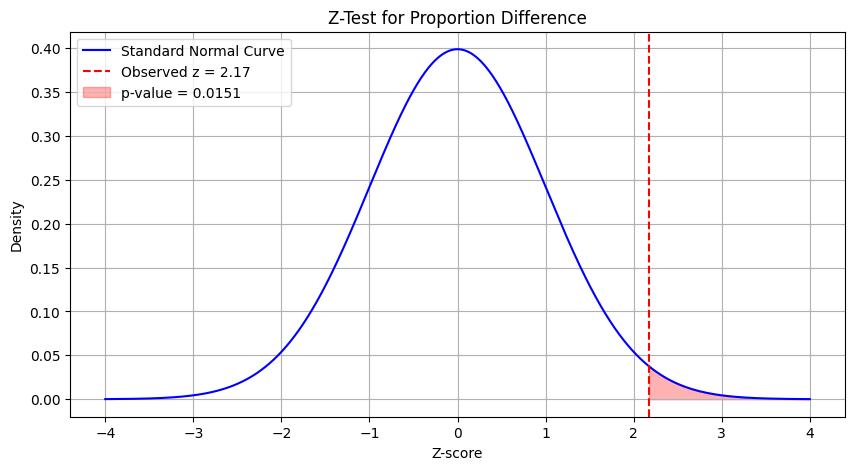

In [25]:
# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Standard Normal Curve', color='blue')
plt.axvline(z_stat, color='red', linestyle='--', label=f'Observed z = {z_stat:.2f}')
plt.fill_between(x, y, where=(x >= z_stat), color='red', alpha=0.3, label=f'p-value = {p_value:.4f}')
plt.title('Z-Test for Proportion Difference')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# -----------------------------
# STEP 9: Print Summary
# -----------------------------

summary = {
    "Sample Proportion A (p̂_A)": round(p_hat_A, 4),
    "Sample Proportion B (p̂_B)": round(p_hat_B, 4),
    "Pooled Proportion (p̂_pooled)": round(p_pooled, 4),
    "Standard Error": round(SE, 4),
    "Z-Statistic": round(z_stat, 4),
    "One-tailed P-Value": round(p_value, 4)
}

summary

{'Sample Proportion A (p̂_A)': np.float64(0.1),
 'Sample Proportion B (p̂_B)': np.float64(0.131),
 'Pooled Proportion (p̂_pooled)': np.float64(0.1155),
 'Standard Error': np.float64(0.0143),
 'Z-Statistic': np.float64(2.1687),
 'One-tailed P-Value': np.float64(0.0151)}